In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import category_encoders as category_encoder
import plotly as py
import matplotlib.pyplot as plt

In [2]:
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv("mcdonalds.csv")
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [4]:
# Check Number of records and number of columns in the dataset
df.shape

(1453, 15)

In [5]:
# Check for Null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


**There are no null values.**

In [6]:
# Check for duplicates
df.duplicated().sum()

22

**There are 22 records which are duplicate.Let us remove these records.**

In [7]:
df.drop_duplicates(keep='first', inplace=True)

In [8]:
df.shape

(1431, 15)

**Removed duplicate records.**

**As we have all data values in string format, we need to convert them into numeric values. As all features have categorical values, we can use LabelEncoding.**

In [9]:
label_encoder = LabelEncoder()

In [10]:
def encode_column_data(df, column_name) :
    df[column_name] = label_encoder.fit_transform(df[column_name])
    #df[column_name] = df[column_name].astype('category')
    return df[column_name]

In [11]:
df['yummy'] = encode_column_data(df, 'yummy')
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,1,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,0,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,1,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,0,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [12]:
df['convenient'] = encode_column_data(df, 'convenient')
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,1,1,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,0,1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,1,1,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,0,1,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [13]:
df['spicy'] = encode_column_data(df, 'spicy')
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,1,1,0,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,0,1,1,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,1,1,0,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,0,1,0,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [14]:
df['fattening'] = encode_column_data(df, 'fattening')
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,1,1,0,1,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,0,1,1,1,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,1,1,0,1,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,0,1,0,1,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [15]:
df['greasy'] = encode_column_data(df, 'greasy')
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,1,1,0,1,1,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,0,1,1,1,1,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,1,1,0,1,1,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,0,1,0,1,1,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [16]:
df['fast'] = encode_column_data(df, 'fast')
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,1,1,0,1,1,1,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,0,1,1,1,1,1,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,1,1,0,1,1,1,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,0,1,0,1,1,1,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [17]:
df['cheap'] = encode_column_data(df, 'cheap')
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,No,Yes,No,No,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,Yes,Yes,No,No,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,Yes,No,No,Yes,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,No,No,Yes,No,+2,49,Once a month,Male


In [18]:
df['tasty'] = encode_column_data(df, 'tasty')
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,Yes,No,No,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,Yes,No,No,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,Yes,Yes,No,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,No,No,Yes,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,No,Yes,No,+2,49,Once a month,Male


In [19]:
df['expensive'] = encode_column_data(df, 'expensive')
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,No,No,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,No,No,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,Yes,No,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,No,Yes,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,Yes,No,+2,49,Once a month,Male


In [20]:
df['healthy'] = encode_column_data(df, 'healthy')
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,No,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,No,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,No,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,Yes,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,No,+2,49,Once a month,Male


In [21]:
df['disgusting'] = encode_column_data(df, 'disgusting')
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


In [22]:
df['Gender'] = encode_column_data(df, 'Gender')
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,0
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,0
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,0
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,0
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,1


In [23]:
def encode_column_visit_frequency(data) :
    ordinal_encoder = category_encoder.OrdinalEncoder(cols=['VisitFrequency'], return_df=True,
                                                  mapping=[{'col':'VisitFrequency',
                                                            'mapping':{'Never':0,'Once a year':1,'Every three months':2,'Once a month':3,'Once a week':4,'More than once a week':5}}])
    data_encoded = ordinal_encoder.fit_transform(data)
    return data_encoded

In [24]:
df = encode_column_visit_frequency(df)
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,2,0
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,2,0
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,2,0
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,4,0
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,3,1


In [25]:
df['Like'] = df['Like'].replace({'I hate it!-5':-5,'I love it!+5':5,'-4':-4,'-3':-3,'-2':-2,'-1':-1,'+4':4,'+3':3,'+2':2,'+1':1}).astype('int32')
df.head(10)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,2,0
1,1,1,0,1,1,1,1,1,1,0,0,2,51,2,0
2,0,1,1,1,1,1,0,1,1,1,0,1,62,2,0
3,1,1,0,1,1,1,1,1,0,0,1,4,69,4,0
4,0,1,0,1,1,1,1,0,0,1,0,2,49,3,1
5,1,1,0,1,0,1,1,1,0,0,0,2,55,2,1
6,1,1,1,1,0,1,0,1,1,1,0,2,56,2,0
7,1,1,0,1,1,1,1,1,0,0,0,5,23,4,0
8,0,0,0,1,1,0,0,0,1,0,1,-5,58,1,1
9,1,1,0,1,1,1,0,1,1,0,0,1,32,2,0


In [26]:
df.dtypes

yummy             int32
convenient        int32
spicy             int32
fattening         int32
greasy            int32
fast              int32
cheap             int32
tasty             int32
expensive         int32
healthy           int32
disgusting        int32
Like              int32
Age               int64
VisitFrequency    int32
Gender            int32
dtype: object

**Check Correlation**

In [27]:
df.corr()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
yummy,1.000000,0.251783,0.011014,-0.087096,-0.149501,0.105388,0.105946,0.683329,-0.062656,0.250295,-0.415754,0.680476,-0.276723,0.506673,-0.064713
convenient,0.251783,1.000000,0.029874,0.037141,-0.105675,0.243447,0.152927,0.288270,-0.165618,0.100224,-0.338588,0.364578,-0.067099,0.313523,-0.042257
spicy,0.011014,0.029874,1.000000,-0.040972,0.054126,0.021957,0.019552,0.062931,0.044465,0.105473,0.031801,-0.007810,0.146512,-0.002785,0.049573
fattening,-0.087096,0.037141,-0.040972,1.000000,0.319529,0.045258,-0.026295,-0.087183,0.089319,-0.331984,0.146833,-0.160301,-0.136318,-0.112328,-0.062007
greasy,-0.149501,-0.105675,0.054126,0.319529,1.000000,-0.058437,-0.076774,-0.161251,0.151917,-0.210503,0.321009,-0.255723,-0.230812,-0.179304,0.021819
fast,0.105388,0.243447,0.021957,0.045258,-0.058437,1.000000,0.251627,0.145512,-0.201183,0.035169,-0.137572,0.168018,-0.019554,0.069730,-0.047506
cheap,0.105946,0.152927,0.019552,-0.026295,-0.076774,0.251627,1.000000,0.142091,-0.718217,0.132001,-0.127146,0.146426,0.017948,0.087351,-0.112432
tasty,0.683329,0.288270,0.062931,-0.087183,-0.161251,0.145512,0.142091,1.000000,-0.107414,0.228226,-0.433350,0.642260,-0.188466,0.455577,-0.047426
expensive,-0.062656,-0.165618,0.044465,0.089319,0.151917,-0.201183,-0.718217,-0.107414,1.000000,-0.070832,0.202451,-0.139950,-0.072344,-0.041028,0.141240
healthy,0.250295,0.100224,0.105473,-0.331984,-0.210503,0.035169,0.132001,0.228226,-0.070832,1.000000,-0.175380,0.283553,0.016804,0.189431,-0.042606


**Plot Correlation Matrix**

<AxesSubplot:>

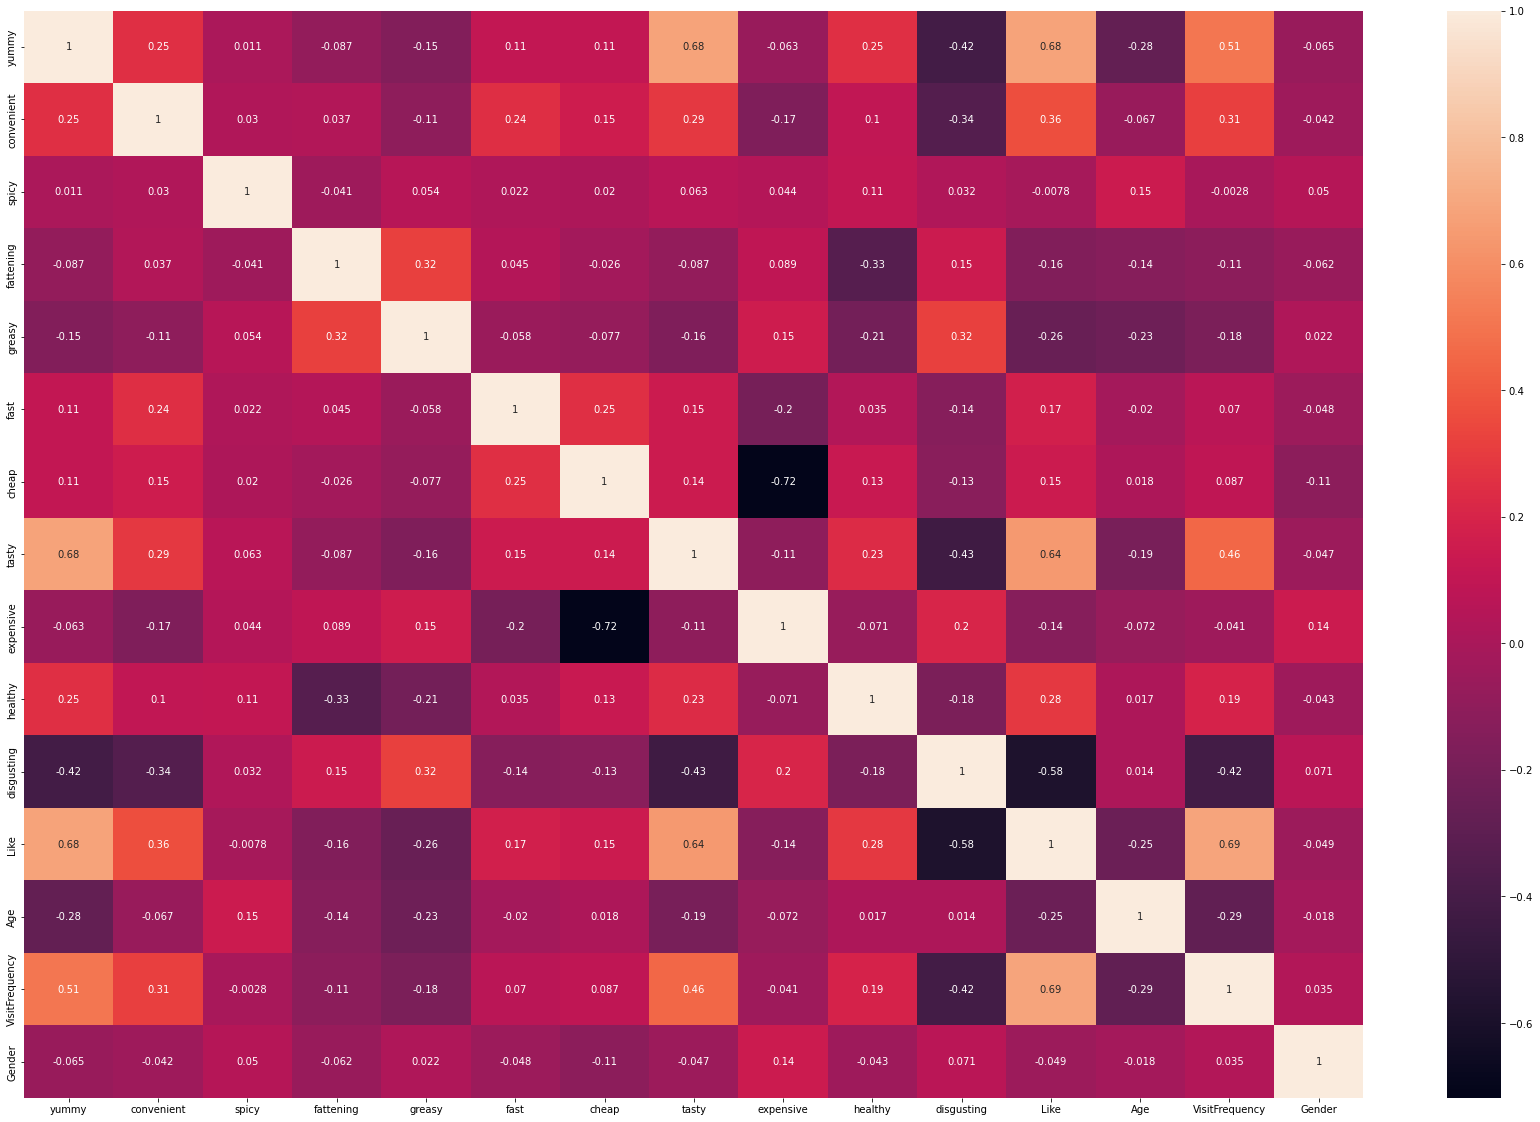

In [28]:
plt.figure(figsize = (30, 20))
sns.heatmap(df.corr(), annot=True)

**Below features are highly correlated.**

1. VisitFrequency and Like
2. Tasty and Like

<AxesSubplot:xlabel='Age', ylabel='Density'>

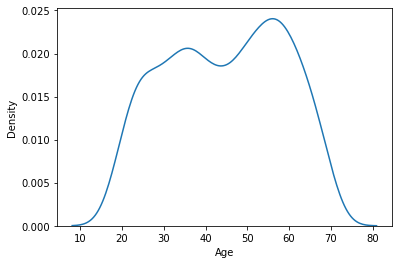

In [29]:
sns.kdeplot(data = df, x = df['Age'])

**Let us check data in different Age bins**

In [30]:
group_labels = ['Kids', 'Young', 'MiddleAge', 'Senior', 'GrandSenior']
group_bins = [0, 19, 29, 49, 69, 79]
pd.cut(df['Age'], bins=group_bins, labels=group_labels).value_counts()

Senior         587
MiddleAge      560
Young          243
Kids            25
GrandSenior     16
Name: Age, dtype: int64

**So We can see that people with age less than 19 and people with age greater than 79 are very less compared to other age groups.**

C:\MySoftwares\Anaconda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

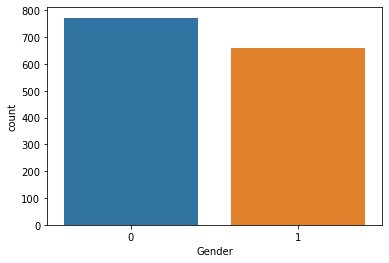

In [31]:
# Check Gender wise customers.
sns.countplot(df['Gender'])

**Number of Female Customers are more than Male customers.**

C:\MySoftwares\Anaconda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='yummy', ylabel='count'>

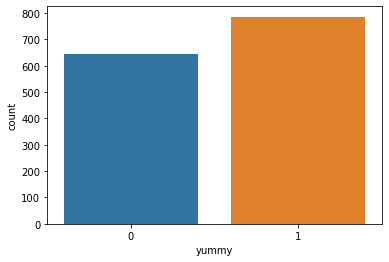

In [32]:
# Check customers for 'yummy' characteristic
sns.countplot(df['yummy'])

C:\MySoftwares\Anaconda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='convenient', ylabel='count'>

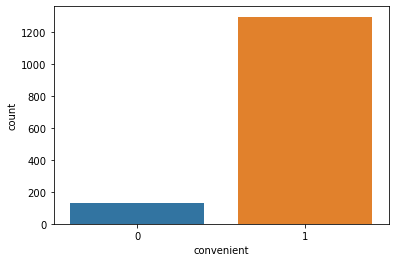

In [33]:
# Check customers for 'convenient' characteristic
sns.countplot(df['convenient'])

**'convenient' seems to be an important feature.**

C:\MySoftwares\Anaconda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='spicy', ylabel='count'>

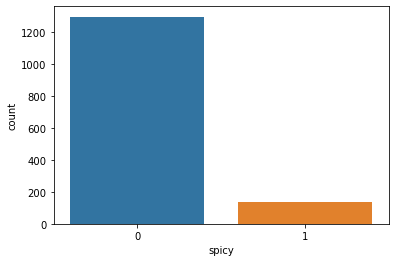

In [34]:
# Check customers for 'spicy' characteristic
sns.countplot(df['spicy'])

**'spicy' seems to be an important feature.**

C:\MySoftwares\Anaconda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fattening', ylabel='count'>

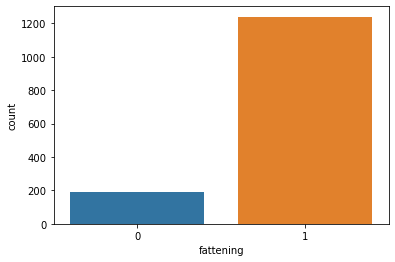

In [35]:
# Check customers for 'fattening' characteristic
sns.countplot(df['fattening'])

**'fattening' seems to be an important feature.**

C:\MySoftwares\Anaconda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='greasy', ylabel='count'>

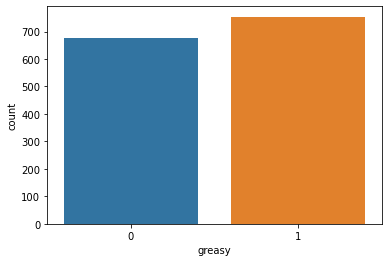

In [36]:
# Check customers for 'greasy' characteristic
sns.countplot(df['greasy'])

**'greasy' seems to be a less important feature.**

C:\MySoftwares\Anaconda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fast', ylabel='count'>

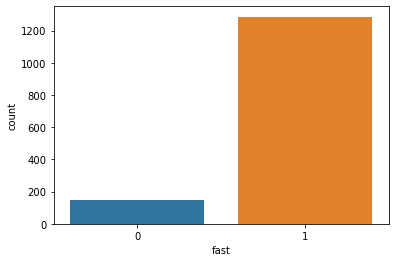

In [37]:
# Check customers for 'fast' characteristic
sns.countplot(df['fast'])

**'fast' seems to be an important feature.**

C:\MySoftwares\Anaconda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cheap', ylabel='count'>

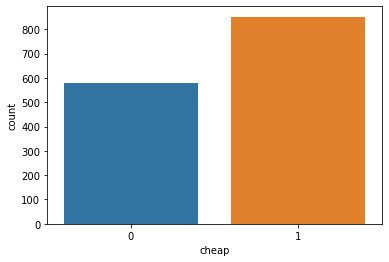

In [38]:
# Check customers for 'cheap' characteristic
sns.countplot(df['cheap'])

**'cheap' seems to have medium differentiating factor.**

C:\MySoftwares\Anaconda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tasty', ylabel='count'>

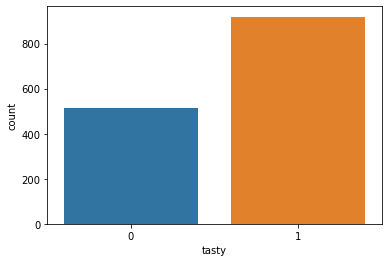

In [39]:
# Check customers for 'tasty' characteristic
sns.countplot(df['tasty'])

**Difference in 'tasty' characteristsic is medium.**

C:\MySoftwares\Anaconda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='expensive', ylabel='count'>

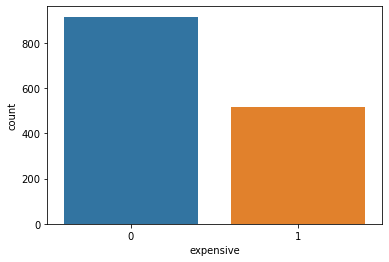

In [40]:
# Check customers for 'expensive' characteristic
sns.countplot(df['expensive'])

**'expensive' characteristic have average difference.**

C:\MySoftwares\Anaconda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='healthy', ylabel='count'>

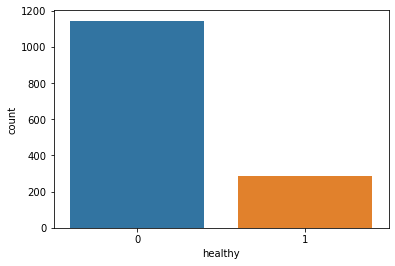

In [41]:
# Check customers for 'healthy' characteristic
sns.countplot(df['healthy'])

**'healthy' characteristic have huge difference.**

C:\MySoftwares\Anaconda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='disgusting', ylabel='count'>

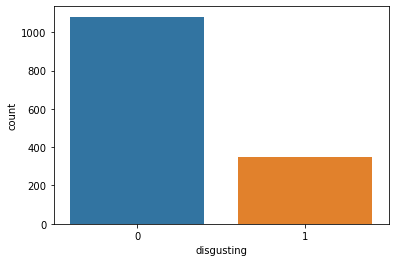

In [42]:
# Check customers for 'disgusting' characteristic
sns.countplot(df['disgusting'])

**'disgusting' characteristic have huge difference.**

**Draw PairPlot**

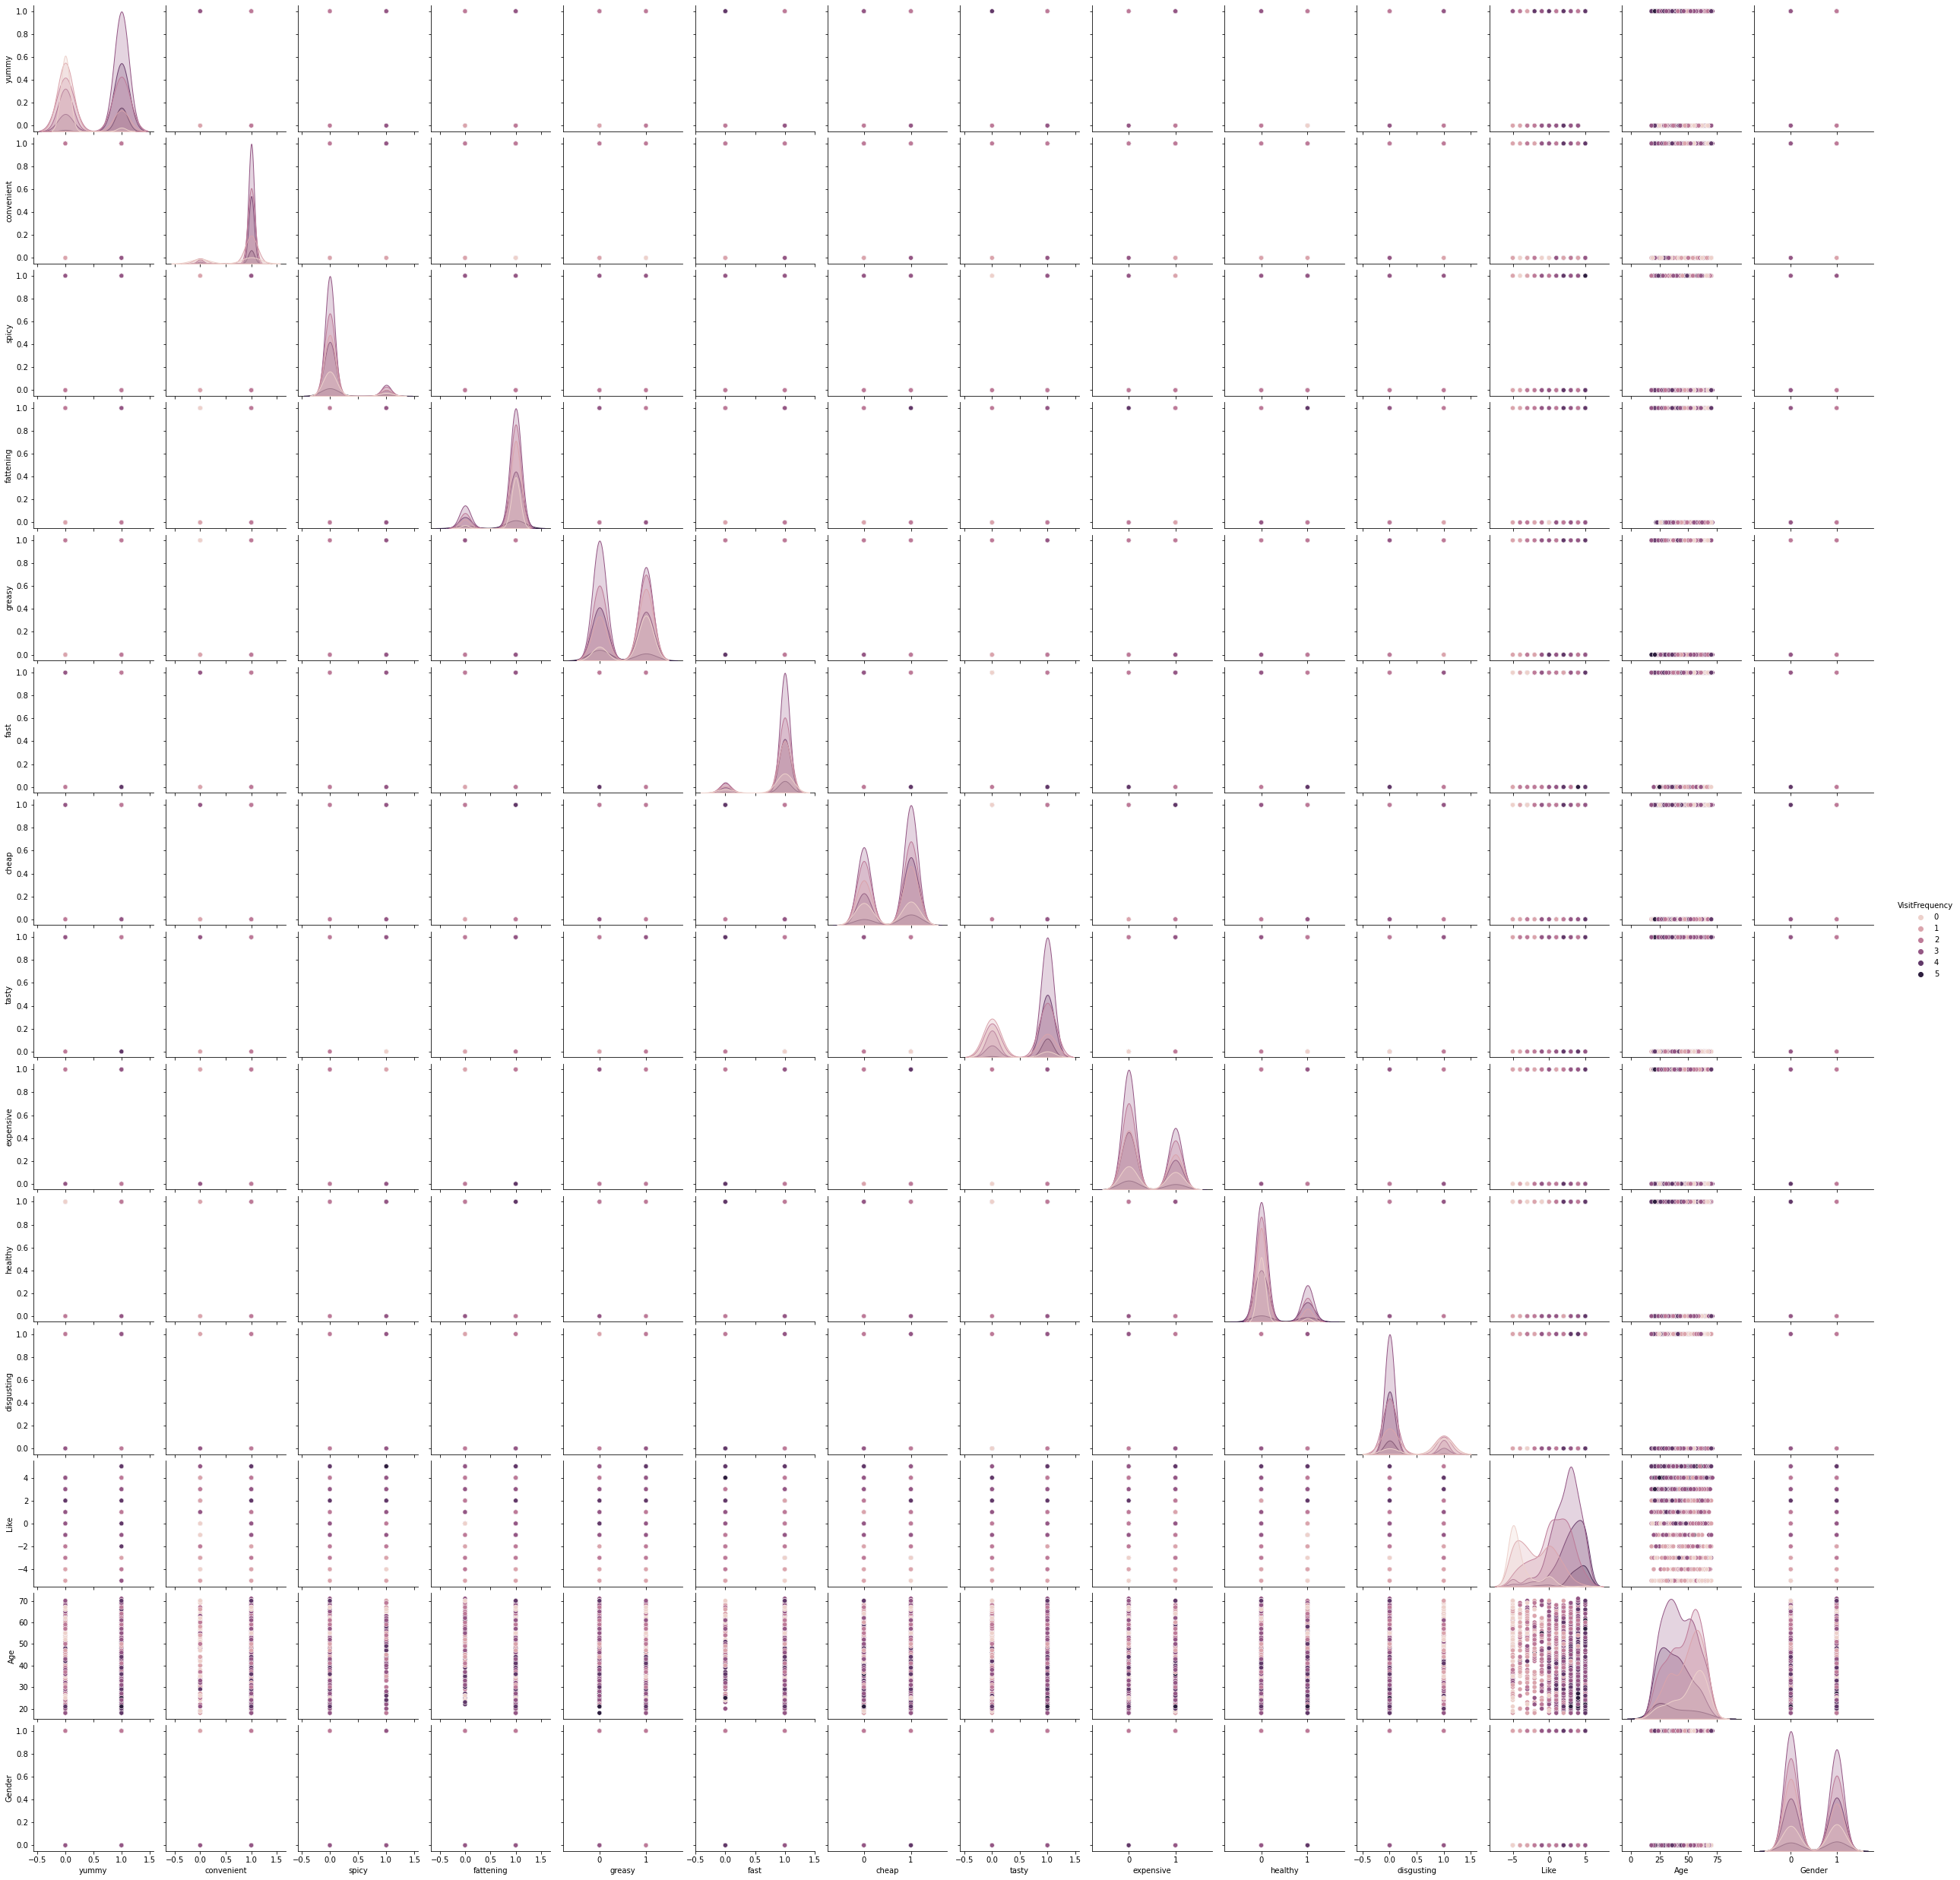

In [43]:
sns.pairplot(df, hue='VisitFrequency')

**According to pairplot above, we can say that there are 2 main segments in the dataset. And Withing these 2 major datasets, there are aproximately 4-6 sub segments.**

**Apply K-Means Clustering**

In [44]:
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans(num_clusters, n_init = 15, random_state=2)
  clusters.fit(df)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( {"num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

C:\MySoftwares\Anaconda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


,num_clusters,cluster_errors
0,1,307704.730957
1,2,89047.933964
2,3,53332.802170
3,4,37471.783844
4,5,30737.389938
5,6,26905.724003
6,7,24382.032274
7,8,21772.052453
8,9,19546.915406
9,10,17736.637252


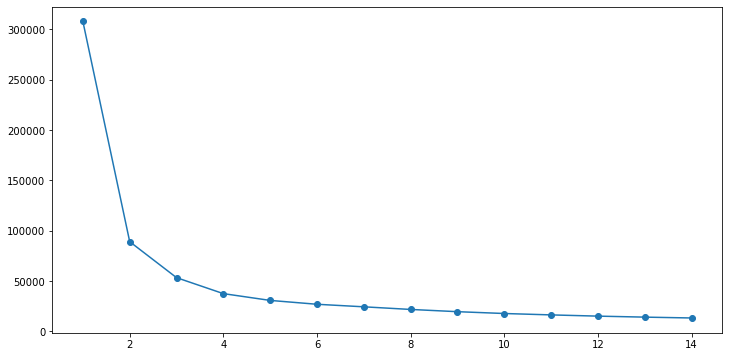

In [45]:
# Draw Elbow Plot

plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

**From Elbow plot, we can consider K = 3**

In [46]:
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2)

In [47]:
kmeans.fit(df)

KMeans(n_clusters=3, n_init=15, random_state=2)

In [48]:
centroids=kmeans.cluster_centers_

In [49]:
centroid_df = pd.DataFrame(centroids, columns = list(df) )
centroid_df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0.416961,0.890459,0.137809,0.818021,0.420495,0.909894,0.630742,0.561837,0.298587,0.201413,0.242049,0.012367,59.298587,1.934629,0.439929
1,0.759804,0.933824,0.051471,0.914216,0.696078,0.914216,0.620098,0.784314,0.367647,0.186275,0.215686,1.897059,26.830882,2.845588,0.460784
2,0.525164,0.903720,0.080963,0.884026,0.507659,0.870897,0.529540,0.614880,0.431072,0.212254,0.273523,0.667396,42.435449,2.512035,0.485777


In [50]:
# Add labels generated by KMeans 
df['class'] = kmeans.labels_

In [51]:
df.head(10)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,class
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,2,0,0
1,1,1,0,1,1,1,1,1,1,0,0,2,51,2,0,0
2,0,1,1,1,1,1,0,1,1,1,0,1,62,2,0,0
3,1,1,0,1,1,1,1,1,0,0,1,4,69,4,0,0
4,0,1,0,1,1,1,1,0,0,1,0,2,49,3,1,2
5,1,1,0,1,0,1,1,1,0,0,0,2,55,2,1,0
6,1,1,1,1,0,1,0,1,1,1,0,2,56,2,0,0
7,1,1,0,1,1,1,1,1,0,0,0,5,23,4,0,1
8,0,0,0,1,1,0,0,0,1,0,1,-5,58,1,1,0
9,1,1,0,1,1,1,0,1,1,0,0,1,32,2,0,1


In [52]:
df['class'].value_counts()

0    566
2    457
1    408
Name: class, dtype: int64

In [53]:
from mpl_toolkits.mplot3d import Axes3D

C:\Users\ARATIS~1\AppData\Local\Temp/ipykernel_5376/3931057268.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=60, azim=120)
C:\Users\ARATIS~1\AppData\Local\Temp/ipykernel_5376/3931057268.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c=L.astype(np.float), edgecolor='k')


Text(0.5, 0.92, '3D plot of KMeans Clustering')

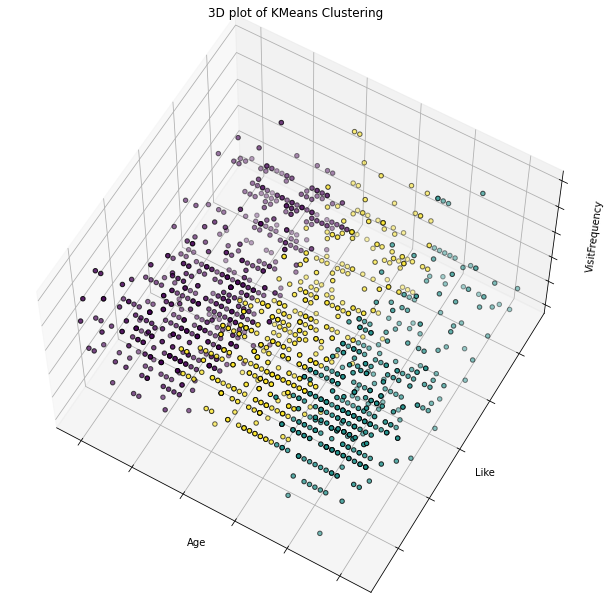

In [54]:
#3D Scatter Plot
fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=60, azim=120)
#kmeans.fit(df_scaled)
L = kmeans.labels_
ax.scatter(df['Age'], df['Like'], df['VisitFrequency'],
           c=L.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Age')
ax.set_ylabel('Like')
ax.set_zlabel('VisitFrequency')
ax.set_title('3D plot of KMeans Clustering')

**By comparing centroid values and this graph, we can say that even when we are able to create different clusters, these clusters are very close to each other. Hence, we need to work on this dataset more and explore few more options.**